# Goals
1. Get NYT or Bloomberg articles on "autonomous vehicles" (alt: cars/vehicles driverless/autonomous)
    a. How do I know if the sentiment rating is accurate?
    b. Bonus - NYT AND Bloomberg
2. Create model for sentiment analysis of articles (Strong or weak positive or negative) 
3. Using datetimes and sentiment rank, create time series model of artcle sentiment and stock price impact (mutliple companies - which are most/least impacted)
4. Do this again for one specific company (named in articles and stock price (Waymo))
5. Create sentiment model to use on twitter data for the same 


In [59]:
# Dependencies
import requests
from pprint import pprint
from dotenv import load_dotenv
import os
import json
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
load_dotenv("/Users/kmarkwardt/robocar-sentiment/main/.env")
NYT_API = os.getenv("NYT_API")
NEWSAPI = os.getenv("NEWSAPI")


In [38]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"

query_terms = ["Autonomous Vehicles", "Driverless Vehicles"]
news_desks = ["Automobiles","Business","Cars","Technology"]

begin_date = "20160101"
end_date = "20240521"

In [39]:
articles_list = []

# loop through pages 0-49
for page in range(0, 50):
    query_url = f'{url}api-key={NYT_API}&q={query_terms[0]}&begin_date={begin_date}&end_date={end_date}'
    # create query with page number
    query_url = f"{query_url}&page={str(page)}"
    articles = requests.get(query_url).json()
    print(f"Calling Page {page}")
    
    # Add a 12 second interval between queries to stay within API query limits (5/min)
    time.sleep(13)
    print("Waiting...")
    # loop through the response and append each article to the list
    for article in articles["response"]["docs"]:
        articles_list.append(article)

num_articles = len(articles_list)
print(f'{num_articles} articles fetched.')

In [40]:
num_articles = len(articles_list)
print(f'{num_articles} articles fetched.')

500 articles fetched.


In [45]:
dates = []
headlines = []
snippets = []

for i in range (0,num_articles):
    date = articles_list[i]['pub_date']
    title = articles_list[i]['headline']['main']
    snippet = articles_list[i]['snippet']
    
    dates.append(date)
    headlines.append(title)
    snippets.append(snippet)

# Combine headlines and snippets
texts = [f"{headline} {snippet}" for headline, snippet in zip(headlines, snippets)]

# Convert date strings to 'YYYY-MM-DD' format
formatted_dates = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z").strftime("%Y-%m-%d") for date in dates]

# Create the dataframe
data = {
    "date": formatted_dates,
    "text": texts
}
df = pd.DataFrame(data)

df.sort_values('date', ascending=True, inplace=True)

unique_dates = df['date'].nunique()
print(f'Unique dates: {unique_dates}')
df.tail()


Unique dates: 413


,date,text
451,2024-04-09,Tesla Settles Lawsuit Over a Fatal Crash Invol...
275,2024-04-23,"Tesla’s Profit Fell 55%, Adding to Concerns Ab..."
355,2024-05-01,"China’s Electric Cars Keep Improving, a Worry ..."
4,2024-05-06,"Wayve, an A.I. Start-Up for Autonomous Driving..."
446,2024-05-08,Billions in Chips Grants Are Expected to Fuel ...


In [43]:
df.to_csv('../resources/NYT_articles.csv')

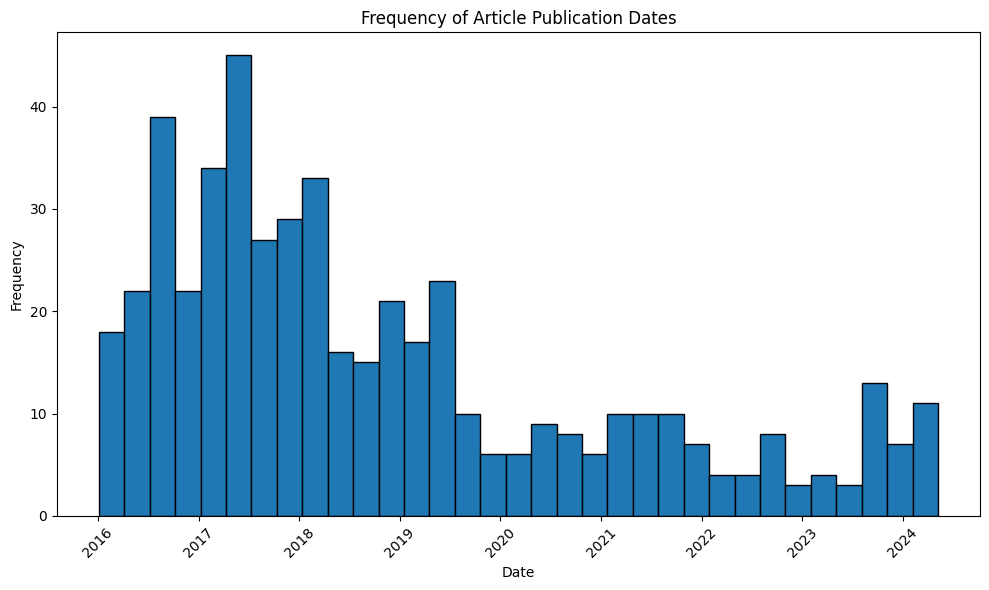

In [65]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['date'], bins=33, edgecolor='black')
plt.title('Frequency of Article Publication Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Old NYT articles

In [48]:
old_articles_list = []

query_url = f'{url}api-key={NYT_API}&q={query_terms[0]}&begin_date=19360101&end_date=19511231'
old_articles = requests.get(query_url).json()

for article in old_articles["response"]["docs"]:
    old_articles_list.append(article)



In [52]:
num_old_articles = len(old_articles_list)

old_dates = []
old_headlines = []
old_snippets = []

for i in range (0,num_old_articles):
    date = old_articles_list[i]['pub_date']
    title = old_articles_list[i]['headline']['main']
    snippet = old_articles_list[i]['snippet']
    
    old_dates.append(date)
    old_headlines.append(title)
    old_snippets.append(snippet)

# Convert date strings to 'YYYY-MM-DD' format
old_formatted_dates = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z").strftime("%Y-%m-%d") for date in old_dates]

# Create the dataframe
old_data = {
    "date": old_formatted_dates,
    "headline": old_headlines,
    "snippet": old_snippets
}
old_df = pd.DataFrame(old_data)

old_df.sort_values('date', ascending=True, inplace=True)

old_df.head(20)
df_3 = old_df.loc[[2]]
text = df_3['snippet']
print(text)

2    OLD NEW YORK CARS CALLED A MENACE; More Than H...
Name: headline, dtype: object


In [58]:
pprint(old_articles_list)

[{'_id': 'nyt://article/e1442f81-8d32-5c11-9da4-17b1607ca97b',
  'abstract': 'CHICAGO, June 29 -- The last nickel transit ride in Chicago was '
              'in 1918, on a street car. The fare on these vehicles now is 13 '
              'cents. On the subway-elevated system the fare is 15 cents, or '
              '20 cents if the ride carries outside the 212 square miles of '
              'the city proper.  ',
  'byline': {'organization': None,
             'original': 'Special to THE NEW YORK TIMES',
             'person': [{'firstname': None,
                         'lastname': None,
                         'middlename': None,
                         'organization': '',
                         'qualifier': None,
                         'rank': 1,
                         'role': 'reported',
                         'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
               'kicker': '1',
               'main': 'CHICAGO',
            

### TO DO

- ~~Get 500 NYT articles~~  
- ~~create a df with headlines, snippets and dates~~  
- ~~save df to resources~~  
- Pick/label 5 def negative, def good.  
- Check the labeled data output on the model  

- mention the old article, maybe

In [ ]:
# Time Series
# Check Time series ML model (prophet) against portfolio of stocks AND individual stocks
# Check sentiment score and Total headlines against stock action
# What's the remainder (unexplained portion of stock action)



In [ ]:
# Social sentiment impact
# See if I can get a fresh set of AV tweets
# Run through the ML model to get sentiment score

# Second time series to see impact of article sentiment on social sentiment

## News API

In [ ]:
# Get 100 NewsAPI (TC) articles
# create a df with articles and dates 
# save df to resources
# Pick/label 5 def negative, def good.
# Check the labeled data output on the model

In [ ]:
# Time Series
# Check Time series ML model (prophet) against portfolio of stocks AND individual stocks
# Check sentiment score and Total headlines against stock action
# What's the remainder (unexplained portion of stock action)